In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.ops import nearest_points
import seaborn as sns

In [2]:
Movements_NS_Amsterdam = pd.read_pickle(os.path.join('Change Data','Movements_NS_Amsterdam'))
Movements_Felyx_Amsterdam = pd.read_pickle('Change Data/movers')

In [5]:
Movements_Felyx_Amsterdam['carId'].unique()

array([8419, 6471, 6398, 6608, 7002, 3955, 7005, 1946, 1258, 6914, 3758,
       2026, 1976, 6353, 2090, 1986, 8494,  853, 8222, 2128,  946, 6843,
       7130, 3902, 2112, 1648, 6411, 3996, 3310, 2059, 8478, 1615,  904,
       2082, 3444, 2740, 2012, 3803, 2707, 8111, 6610, 6570, 6424, 6553,
       3243, 6386, 1694, 6528, 6861, 4085, 6616, 8263, 8429, 6924, 4048,
       1985, 8446,  982, 6409,  961, 1678, 3851, 1984, 8474, 2088, 4030,
       2003, 1200, 2109, 8265, 6612, 6416, 6432, 1975, 7126, 8546, 2736,
       6541, 1972, 6609, 8481, 6410,  901, 6548, 1163, 6972, 2047, 2163,
        899, 1183, 6415, 2086, 6406, 4008, 3597, 1123, 2039, 1230, 2028,
       6554, 8468, 1099, 3912, 7032,  884, 6426, 1964, 1182, 6597, 6582,
       6552, 1997, 1662, 3269, 6600, 6430, 1265,  868, 1054, 1249, 2105,
       2162, 8520, 2115, 1047, 2016, 2153, 2726, 1808, 1136, 6560,  969,
       1085, 1188, 2076, 2081, 2134, 2739, 3771, 3861, 7008, 8509, 8550,
       2025, 6939, 8236, 6893, 1169, 6974, 2064, 25

In [3]:
Gebieden =gpd.read_file('PublicGeoJsons/AmsterdamGebieden.json')
Stadsdelen = gpd.read_file('PublicGeoJsons/AmsterdamStadsdelen.json')
Stations = Movements_NS_Amsterdam.groupby('name').nth(0)

In [4]:
Prev_Movements_Felyx_Amsterdam = Movements_Felyx_Amsterdam.set_geometry('prev_location', drop = True)

In [6]:
totalbikes = pd.read_pickle('availibility').max()
totalbikes

2407

In [ ]:
Popularity = list(Movements_NS_Amsterdam.groupby('name').mean().sort_values(by = 'num_bikes_available', ascending = False).index)

In [145]:
def sliceNS(df, time, l, h, stlow, sthigh, popularity = Popularity):
    if time == 'hour':
        tdf = df.loc[(df.time.dt.hour > l) & (df.time.dt.hour < h)]
    if time == 'day':
        tdf = df.loc[(df.time.dt.day > l) & (df.time.dt.day < h)]
    stdf = tdf[tdf['name'].isin(popularity[stlow:sthigh])]

    return stdf

In [146]:
sliceNS(Movements_NS_Amsterdam, 'day', 3,9, 1, 3)

,station_id,num_bikes_available,time,name,lat,lon,geometry,diffs,index_right,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
25,asa001,61,2023-03-04 00:00:00,Amsterdam Amstel,52.347010,4.918750,POINT (4.91875 52.34701),0.128037,16,GM16,Watergraafsmeer,M,Oost,8992598
25,asa001,62,2023-03-04 00:08:00,Amsterdam Amstel,52.347010,4.918750,POINT (4.91875 52.34701),0.127000,16,GM16,Watergraafsmeer,M,Oost,8992598
25,asa001,63,2023-03-04 00:13:00,Amsterdam Amstel,52.347010,4.918750,POINT (4.91875 52.34701),0.125988,16,GM16,Watergraafsmeer,M,Oost,8992598
25,asa001,64,2023-03-04 00:15:00,Amsterdam Amstel,52.347010,4.918750,POINT (4.91875 52.34701),0.125000,16,GM16,Watergraafsmeer,M,Oost,8992598
25,asa001,65,2023-03-04 00:17:00,Amsterdam Amstel,52.347010,4.918750,POINT (4.91875 52.34701),0.124035,16,GM16,Watergraafsmeer,M,Oost,8992598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,asd008,227,2023-03-08 23:02:00,Amsterdam Centraal IJzijde,52.380095,4.898784,POINT (4.89878 52.38009),0.066372,0,GA01,Centrum-West,A,Centrum,3450130
248,asd008,229,2023-03-08 23:08:00,Amsterdam Centraal IJzijde,52.380095,4.898784,POINT (4.89878 52.38009),0.132164,0,GA01,Centrum-West,A,Centrum,3450130
248,asd008,231,2023-03-08 23:10:00,Amsterdam Centraal IJzijde,52.380095,4.898784,POINT (4.89878 52.38009),0.131590,0,GA01,Centrum-West,A,Centrum,3450130
248,asd008,233,2023-03-08 23:13:00,Amsterdam Centraal IJzijde,52.380095,4.898784,POINT (4.89878 52.38009),0.131024,0,GA01,Centrum-West,A,Centrum,3450130


In [143]:
Movements_NS_Amsterdam.time.dt.day

25      1
25      1
25      1
25      1
25      1
       ..
245    31
245    31
245    31
245    31
245    31
Name: time, Length: 22363, dtype: int64

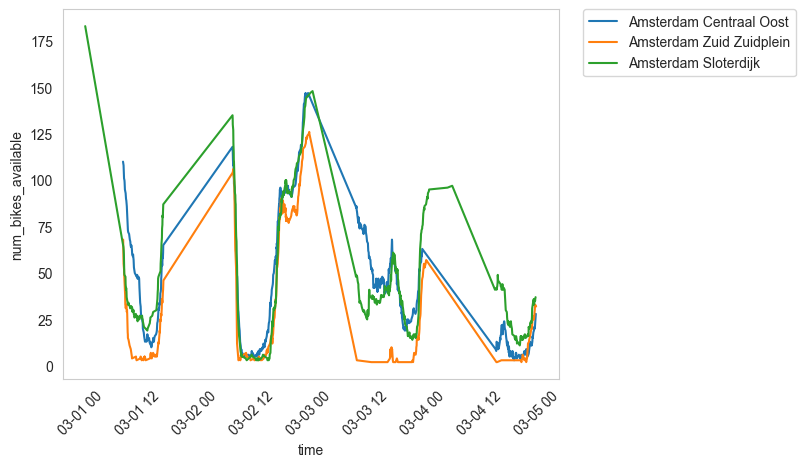

In [159]:
data = Movements_NS_Amsterdam[Movements_NS_Amsterdam['name'].isin(Popularity[3:6])]
data = data.loc[data.time.dt.day < 5]

available = sns.lineplot(x = "time", y = "num_bikes_available", data = data,
             hue = 'name', legend = True)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

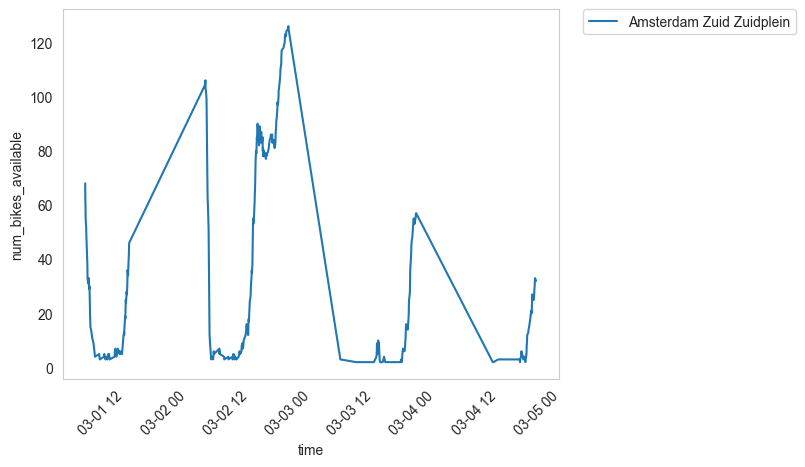

In [160]:
data = Movements_NS_Amsterdam[Movements_NS_Amsterdam['name'].isin(Popularity[5:6])]
data = data.loc[data.time.dt.day < 5]

available = sns.lineplot(x = "time", y = "num_bikes_available", data = data,
             hue = 'name', legend = True)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

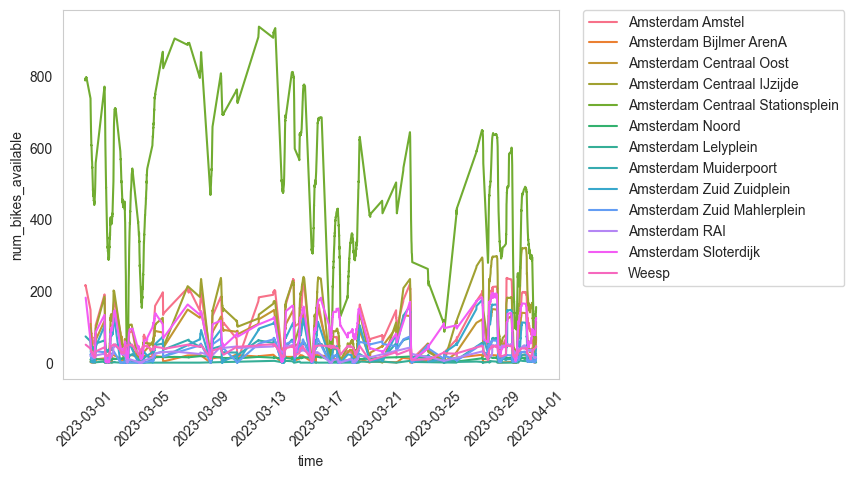

In [158]:
available = sns.lineplot(x = "time", y = "num_bikes_available", data = Movements_NS_Amsterdam,
             hue = 'name', legend = True)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [8]:
AmsMultiPoint = Stations.geometry.unary_union
near = nearest_points(Prev_Movements_Felyx_Amsterdam.geometry,AmsMultiPoint)[1] #Nearest Series, [0] are the points themselves
# envgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(near), crs='EPSG:4326')
# info = envgdf.sjoin(gpd2[['geometry', 'name']])
Prev_Movements_Felyx_Amsterdam['distance_to_NS']  = Prev_Movements_Felyx_Amsterdam.geometry.distance(AmsMultiPoint)
Prev_Movements_Felyx_Amsterdam['NearestNS'] = near
F_Close_2_NS = Prev_Movements_Felyx_Amsterdam[Prev_Movements_Felyx_Amsterdam['distance_to_NS']<0.005]


/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_1226/2061954489.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Prev_Movements_Felyx_Amsterdam['distance_to_NS']  = Prev_Movements_Felyx_Amsterdam.geometry.distance(AmsMultiPoint)


In [10]:
AmsMultiPoint = Stations.geometry.unary_union
def add_nearest_NS(df):
    #Nearest Series, [0] are the points themselves
    near = nearest_points(df.geometry,AmsMultiPoint)[1]
    df['distance_to_NS']  = df.geometry.distance(AmsMultiPoint)
    df['NearestNS'] = near
    return df


In [11]:
Movements_Felyx_Amsterdam = add_nearest_NS(Movements_Felyx_Amsterdam)
Movements_Felyx_Amsterdam.columns

/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_1226/3400034305.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['distance_to_NS']  = df.geometry.distance(AmsMultiPoint)


Index(['carId', 'fuelLevel', 'time', 'geometry', 'Gebied', 'Stadsdeel',
       'prev_location', 'prev_Gebied', 'prev_time', 'prev_fl', 'movement',
       'distancemoved', 'distance_to_NS', 'NearestNS'],
      dtype='object')

In [34]:
Prev_Movements_Felyx_Amsterdam = add_nearest_NS(Prev_Movements_Felyx_Amsterdam)
Prev_Movements_Felyx_Amsterdam.columns

/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_8314/708788928.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['distance_to_NS']  = df.geometry.distance(AmsMultiPoint)


Index(['carId', 'fuelLevel', 'time', 'geometry', 'Gebied', 'Stadsdeel',
       'prev_Gebied', 'prev_time', 'prev_fl', 'movement', 'distancemoved',
       'distance_to_NS', 'NearestNS'],
      dtype='object')

In [35]:
F_Close_2_NS = Prev_Movements_Felyx_Amsterdam[Prev_Movements_Felyx_Amsterdam['distance_to_NS']<0.005]

In [43]:
def plotams(Region_type, df, col, legend = False):
    fig, ax = plt.subplots()
    # gpdbefore.plot(ax =ax, markersize = 3, column = gpdbefore.Nearest)
    df.plot(ax =ax, markersize = 3, column = df[col], legend = legend)
    Stations.plot(ax =ax, markersize = 10, marker = 'x', color = 'black')
    Region_type.plot(ax = ax, facecolor="none", edgecolor='black', lw=0.7)
    plt.show()

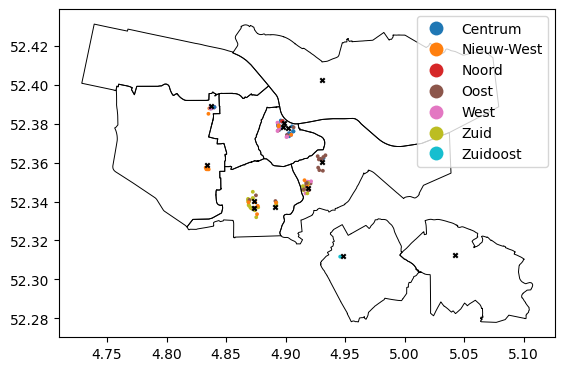

In [44]:
#Felyxes that start up near a station
plotams(Stadsdelen, F_Close_2_NS, 'Stadsdeel', True)

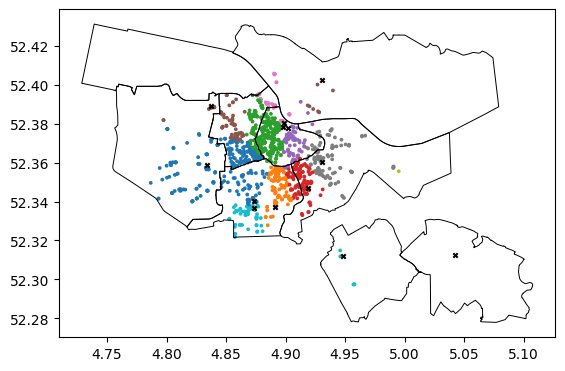

In [39]:
plotams(Stadsdelen, Movements_Felyx_Amsterdam, 'NearestNS')

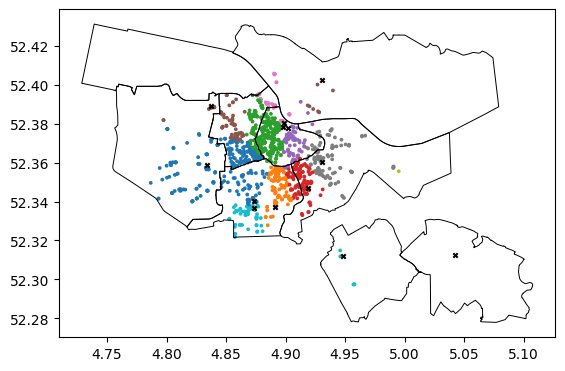

In [40]:
plotams(Stadsdelen, Movements_Felyx_Amsterdam, 'NearestNS')

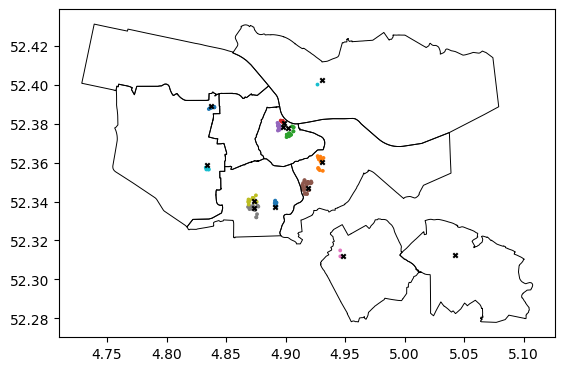

In [42]:
#Felyxes that end up near a station
plotams(Stadsdelen,
        Movements_Felyx_Amsterdam[Movements_Felyx_Amsterdam['distance_to_NS']<0.005],
        'NearestNS')

In [45]:
F_Close_2_NS

,carId,fuelLevel,time,geometry,Gebied,Stadsdeel,prev_Gebied,prev_time,prev_fl,movement,distancemoved,distance_to_NS,NearestNS
131,2012,66,2023-03-10 17:18:56,POINT (4.89228 52.33810),"De Pijp, Rivierenbuurt",Zuid,"De Pijp, Rivierenbuurt",2023-03-10 17:12:32,68.0,"De Pijp, RivierenbuurtDe Pijp, Rivierenbuurt",0.012711,0.001750,POINT (4.89075 52.33725)
416,8419,31,2023-03-10 18:37:52,POINT (4.89227 52.33948),"De Pijp, Rivierenbuurt",Zuid,"De Pijp, Rivierenbuurt",2023-03-10 11:35:28,49.0,"De Pijp, RivierenbuurtDe Pijp, Rivierenbuurt",0.017268,0.002699,POINT (4.89075 52.33725)
124,1972,94,2023-03-10 18:44:16,POINT (4.87250 52.34500),"De Pijp, Rivierenbuurt",Zuid,Oud-Zuid,2023-03-10 18:25:04,95.0,"De Pijp, RivierenbuurtOud-Zuid",0.029378,0.004788,POINT (4.87338 52.34029)
69,1230,95,2023-03-10 11:41:52,POINT (4.83521 52.38503),Sloterdijk Nieuw-West,Nieuw-West,Sloterdijk Nieuw-West,2023-03-10 11:41:52,95.0,Sloterdijk Nieuw-WestSloterdijk Nieuw-West,0.002452,0.004411,POINT (4.83707 52.38903)
68,1230,95,2023-03-10 11:50:24,POINT (4.83594 52.38782),Sloterdijk Nieuw-West,Nieuw-West,Sloterdijk Nieuw-West,2023-03-10 11:50:24,95.0,Sloterdijk Nieuw-WestSloterdijk Nieuw-West,0.001563,0.001656,POINT (4.83707 52.38903)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,1182,33,2023-03-10 17:21:04,POINT (4.89714 52.38125),Noord-West,Noord,Centrum-West,2023-03-10 15:40:48,34.0,Noord-WestCentrum-West,0.025013,0.002009,POINT (4.89878 52.38009)
256,3851,50,2023-03-09 23:00:16,POINT (4.87669 52.33778),Osdorp,Nieuw-West,"Buitenveldert, Zuidas",2023-03-10 21:15:44,16.0,"OsdorpBuitenveldert, Zuidas",0.076975,0.003514,POINT (4.87344 52.33645)
273,3987,47,2023-03-09 23:00:16,POINT (4.83344 52.35659),Osdorp,Nieuw-West,Slotervaart,2023-03-10 07:53:36,36.0,OsdorpSlotervaart,0.031301,0.002101,POINT (4.83390 52.35864)
224,2741,86,2023-03-10 08:34:08,POINT (4.83547 52.35652),Osdorp,Nieuw-West,Slotervaart,2023-03-10 08:23:28,90.0,OsdorpSlotervaart,0.031492,0.002640,POINT (4.83390 52.35864)


In [46]:
Movements_Felyx_Amsterdam

,carId,fuelLevel,time,geometry,Gebied,Stadsdeel,prev_location,prev_Gebied,prev_time,prev_fl,movement,distancemoved,distance_to_NS,NearestNS
416,8419,66,2023-03-10 00:40:32,POINT (4.84841 52.35051),Oud-Zuid,Zuid,POINT (4.85636 52.35253),Oud-Zuid,2023-03-09 23:10:56,83.0,Oud-ZuidOud-Zuid,0.008199,0.016636,POINT (4.83390 52.35864)
297,6471,61,2023-03-10 07:45:04,POINT (4.86525 52.35052),Oud-Zuid,Zuid,POINT (4.86406 52.35181),Oud-Zuid,2023-03-09 23:06:40,72.0,Oud-ZuidOud-Zuid,0.001754,0.013066,POINT (4.87338 52.34029)
296,6398,18,2023-03-10 08:27:44,POINT (4.88622 52.35400),Oud-Zuid,Zuid,POINT (4.85255 52.35118),Oud-Zuid,2023-03-10 08:06:24,21.0,Oud-ZuidOud-Zuid,0.033784,0.017351,POINT (4.89075 52.33725)
344,6608,39,2023-03-10 08:36:16,POINT (4.88587 52.35211),Oud-Zuid,Zuid,POINT (4.88398 52.34910),Oud-Zuid,2023-03-10 07:57:52,50.0,Oud-ZuidOud-Zuid,0.003555,0.015639,POINT (4.89075 52.33725)
381,7002,87,2023-03-10 08:57:36,POINT (4.86584 52.34679),Oud-Zuid,Zuid,POINT (4.86747 52.35511),Oud-Zuid,2023-03-10 06:21:52,96.0,Oud-ZuidOud-Zuid,0.008476,0.009953,POINT (4.87338 52.34029)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1952,24,2023-03-10 12:54:24,POINT (4.80529 52.36015),Osdorp,Nieuw-West,POINT (4.83414 52.36423),Slotervaart,2023-03-10 12:39:28,28.0,OsdorpSlotervaart,0.029135,0.028648,POINT (4.83390 52.35864)
192,2142,72,2023-03-10 15:17:20,POINT (4.80769 52.36007),Osdorp,Nieuw-West,POINT (4.80356 52.35875),Osdorp,2023-03-10 15:08:48,77.0,OsdorpOsdorp,0.004332,0.026253,POINT (4.83390 52.35864)
54,1173,65,2023-03-10 16:38:24,POINT (4.80039 52.35225),Osdorp,Nieuw-West,POINT (4.83746 52.37062),Slotervaart,2023-03-10 22:58:08,57.0,OsdorpSlotervaart,0.041376,0.034112,POINT (4.83390 52.35864)
403,8493,83,2023-03-10 17:46:40,POINT (4.80324 52.35997),Osdorp,Nieuw-West,POINT (4.87606 52.33351),"Buitenveldert, Zuidas",2023-03-10 07:19:28,96.0,"OsdorpBuitenveldert, Zuidas",0.077479,0.030687,POINT (4.83390 52.35864)


In [47]:
Movements_NS_Amsterdam

,station_id,num_bikes_available,time,name,lat,lon,geometry,diffs,index_right,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
26,asa001,192,2023-03-31 00:12:00,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.144338,16,GM16,Watergraafsmeer,M,Oost,8992598
26,asa001,194,2023-03-31 00:25:00,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.143592,16,GM16,Watergraafsmeer,M,Oost,8992598
26,asa001,195,2023-03-31 00:27:00,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071611,16,GM16,Watergraafsmeer,M,Oost,8992598
26,asa001,196,2023-03-31 00:31:00,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071429,16,GM16,Watergraafsmeer,M,Oost,8992598
26,asa001,197,2023-03-31 00:51:00,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071247,16,GM16,Watergraafsmeer,M,Oost,8992598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,wp001,40,2023-03-31 21:07:00,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.158114,24,GS25,"Weesp, Driemond",S,Weesp,26290254
245,wp001,42,2023-03-31 22:06:00,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.308607,24,GS25,"Weesp, Driemond",S,Weesp,26290254
245,wp001,44,2023-03-31 23:02:00,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.301511,24,GS25,"Weesp, Driemond",S,Weesp,26290254
245,wp001,45,2023-03-31 23:55:00,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.149071,24,GS25,"Weesp, Driemond",S,Weesp,26290254


In [51]:
Movements_NS_Amsterdam.set_index('time').to_period(freq='H')#.groupby('name').mean()

,station_id,num_bikes_available,name,lat,lon,geometry,diffs,index_right,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
time,,,,,,,,,,,,,
2023-03-31 00:00,asa001,192,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.144338,16,GM16,Watergraafsmeer,M,Oost,8992598
2023-03-31 00:00,asa001,194,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.143592,16,GM16,Watergraafsmeer,M,Oost,8992598
2023-03-31 00:00,asa001,195,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071611,16,GM16,Watergraafsmeer,M,Oost,8992598
2023-03-31 00:00,asa001,196,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071429,16,GM16,Watergraafsmeer,M,Oost,8992598
2023-03-31 00:00,asa001,197,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071247,16,GM16,Watergraafsmeer,M,Oost,8992598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 21:00,wp001,40,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.158114,24,GS25,"Weesp, Driemond",S,Weesp,26290254
2023-03-31 22:00,wp001,42,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.308607,24,GS25,"Weesp, Driemond",S,Weesp,26290254
2023-03-31 23:00,wp001,44,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.301511,24,GS25,"Weesp, Driemond",S,Weesp,26290254


In [87]:
hourly = Movements_NS_Amsterdam.set_index('time').to_period(freq='H').reset_index()

In [109]:
hourly

,time,station_id,num_bikes_available,name,lat,lon,geometry,diffs,index_right,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
0,2023-03-31 00:00,asa001,192,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.144338,16,GM16,Watergraafsmeer,M,Oost,8992598
1,2023-03-31 00:00,asa001,194,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.143592,16,GM16,Watergraafsmeer,M,Oost,8992598
2,2023-03-31 00:00,asa001,195,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071611,16,GM16,Watergraafsmeer,M,Oost,8992598
3,2023-03-31 00:00,asa001,196,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071429,16,GM16,Watergraafsmeer,M,Oost,8992598
4,2023-03-31 00:00,asa001,197,Amsterdam Amstel,52.34701,4.91875,POINT (4.91875 52.34701),0.071247,16,GM16,Watergraafsmeer,M,Oost,8992598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,2023-03-31 21:00,wp001,40,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.158114,24,GS25,"Weesp, Driemond",S,Weesp,26290254
2150,2023-03-31 22:00,wp001,42,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.308607,24,GS25,"Weesp, Driemond",S,Weesp,26290254
2151,2023-03-31 23:00,wp001,44,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.301511,24,GS25,"Weesp, Driemond",S,Weesp,26290254
2152,2023-03-31 23:00,wp001,45,Weesp,52.31266,5.04215,POINT (5.04215 52.31266),0.149071,24,GS25,"Weesp, Driemond",S,Weesp,26290254


In [94]:
hourlygrouped = hourly.groupby(['name', 'time']).mean()

/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_8314/38347021.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourlygrouped = hourly.groupby(['name', 'time']).mean()


In [95]:
hourlygrouped

num_bikes_available       lat      lon  \
name             time                                                       
Amsterdam Amstel 2023-03-31 00:00           194.800000  52.34701  4.91875   
                 2023-03-31 01:00           198.500000  52.34701  4.91875   
                 2023-03-31 03:00           198.000000  52.34701  4.91875   
                 2023-03-31 05:00           198.000000  52.34701  4.91875   
                 2023-03-31 06:00           198.500000  52.34701  4.91875   
...                                                ...       ...      ...   
Weesp            2023-03-31 19:00            38.000000  52.31266  5.04215   
                 2023-03-31 20:00            39.000000  52.31266  5.04215   
                 2023-03-31 21:00            40.000000  52.31266  5.04215   
                 2023-03-31 22:00            42.000000  52.31266  5.04215   
                 2023-03-31 23:00            45.666667  52.31266  5.04215   

                                      diffs  index_right  Oppervlakte_m2  
name             time                                                     
Amsterdam Amstel 2023-03-31 00:00  0.100443         16.0       8992598.0  
                 2023-03-31 01:00  0.070978         16.0       8992598.0  
                 2023-03-31 03:00 -0.000359         16.0       8992598.0  
                 2023-03-31 05:00 -0.000359         16.0       8992598.0  
                 2023-03-31 06:00 -0.000089         16.0       8992598.0  
...                                     ...          ...             ...  
Weesp            2023-03-31 19:00  0.038964         24.0      26290254.0  
                 2023-03-31 20:00  0.160128         24.0      26290254.0  
                 2023-03-31 21:00  0.158114         24.0      26290254.0  
                 2023-03-31 22:00  0.308607         24.0      26290254.0  
                 2023-03-31 23:00  0.294532         24.0      26290254.0  

[231 rows x 6 columns]

In [39]:
def resamplemovement(df, resolution):
    resampled = df.set_index('time').groupby('name').resample(resolution).mean(numeric_only=True).reset_index()
    resampled.fillna(method='ffill', inplace = True)
    return resampled
qhourly = resamplemovement(Movements_NS_Amsterdam, '15T')
#Missing vales from first 10 mins because there are no movements
minutely = resamplemovement(Movements_NS_Amsterdam, '1T')

In [41]:
hourly.name.unique()

array(['Amsterdam Amstel', 'Amsterdam Bijlmer ArenA',
       'Amsterdam Centraal IJzijde', 'Amsterdam Centraal Oost',
       'Amsterdam Centraal Stationsplein', 'Amsterdam Lelyplein',
       'Amsterdam Muiderpoort', 'Amsterdam Noord', 'Amsterdam RAI',
       'Amsterdam Sloterdijk', 'Amsterdam Zuid Mahlerplein',
       'Amsterdam Zuid Zuidplein', 'Weesp'], dtype=object)

In [42]:
reset = hourlygrouped.reset_index()
reset#.groupby('time').sum().div(13)

NameError: name 'qhourlygrouped' is not defined

In [97]:
reset.groupby('time').sum().div(13)

/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_8314/3208916728.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reset.groupby('time').sum().div(13)


,num_bikes_available,lat,lon,diffs,index_right,Oppervlakte_m2
time,,,,,,
2023-03-31 00:00,99.924176,28.194751,2.633079,0.045683,4.461538,3.184097e+06
2023-03-31 01:00,76.084249,12.085045,1.131939,0.005542,1.230769,1.222528e+06
2023-03-31 02:00,38.410256,8.056837,0.756047,0.018639,1.076923,4.334575e+05
2023-03-31 03:00,56.707692,16.112701,1.510631,-0.128708,3.538462,5.120511e+06
2023-03-31 04:00,37.461538,4.029114,0.376744,0.001743,0.000000,2.653946e+05
2023-03-31 05:00,86.769231,28.195543,2.641642,0.025275,5.461538,6.155746e+06
2023-03-31 06:00,99.128205,20.141147,1.878897,-0.013573,2.538462,2.414256e+06
2023-03-31 07:00,116.645513,36.246086,3.394928,-0.062442,6.076923,5.905534e+06
2023-03-31 08:00,108.082457,52.356342,4.906002,-0.206039,10.923077,1.032925e+07


In [141]:
pct = reset['num_bikes_available'] / reset.groupby('time')['num_bikes_available'].transform('sum')

In [142]:
reset['pct_at_hour'] = pct

In [78]:
#Fails to capture that some dont change at all, need pct change from a certain amount
reset[['name', 'time', 'pct_at_hour', 'num_bikes_available']]

,name,time,pct,num_bikes_available
0,Amsterdam Amstel,2023-03-31 00:00,0.149960,194.800000
1,Amsterdam Amstel,2023-03-31 01:00,0.200688,198.500000
2,Amsterdam Amstel,2023-03-31 03:00,0.268584,198.000000
3,Amsterdam Amstel,2023-03-31 05:00,0.175532,198.000000
4,Amsterdam Amstel,2023-03-31 06:00,0.154035,198.500000
...,...,...,...,...
226,Weesp,2023-03-31 19:00,0.083102,38.000000
227,Weesp,2023-03-31 20:00,0.104907,39.000000
228,Weesp,2023-03-31 21:00,0.122546,40.000000
229,Weesp,2023-03-31 22:00,0.097649,42.000000


In [43]:
#Closest Estimate of Fleet in given time period
max_bikes = minutely.groupby('time').sum().num_bikes_available.max()
max_bikes

/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_3833/1232222407.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  max_bikes = minutely.groupby('time').sum().num_bikes_available.max()


1984.0

In [132]:
reset['pct_of_fleet'] = reset.num_bikes_available.div(max_bikes)
reset[['name', 'time', 'pct_of_fleet', 'num_bikes_available']]

,name,time,pct_of_fleet,num_bikes_available
0,Amsterdam Amstel,2023-03-31 00:00,0.124473,194.800000
1,Amsterdam Amstel,2023-03-31 01:00,0.126837,198.500000
2,Amsterdam Amstel,2023-03-31 03:00,0.126518,198.000000
3,Amsterdam Amstel,2023-03-31 05:00,0.126518,198.000000
4,Amsterdam Amstel,2023-03-31 06:00,0.126837,198.500000
...,...,...,...,...
226,Weesp,2023-03-31 19:00,0.024281,38.000000
227,Weesp,2023-03-31 20:00,0.024920,39.000000
228,Weesp,2023-03-31 21:00,0.025559,40.000000
229,Weesp,2023-03-31 22:00,0.026837,42.000000


In [160]:
reset

,name,time,num_bikes_available,lat,lon,diffs,index_right,Oppervlakte_m2,pct_of_fleet,pct_at_hour
0,Amsterdam Amstel,2023-03-31 00:00,194.800000,52.34701,4.91875,0.100443,16.0,8992598.0,0.124473,0.149960
1,Amsterdam Amstel,2023-03-31 01:00,198.500000,52.34701,4.91875,0.070978,16.0,8992598.0,0.126837,0.200688
2,Amsterdam Amstel,2023-03-31 03:00,198.000000,52.34701,4.91875,-0.000359,16.0,8992598.0,0.126518,0.268584
3,Amsterdam Amstel,2023-03-31 05:00,198.000000,52.34701,4.91875,-0.000359,16.0,8992598.0,0.126518,0.175532
4,Amsterdam Amstel,2023-03-31 06:00,198.500000,52.34701,4.91875,-0.000089,16.0,8992598.0,0.126837,0.154035
...,...,...,...,...,...,...,...,...,...,...
226,Weesp,2023-03-31 19:00,38.000000,52.31266,5.04215,0.038964,24.0,26290254.0,0.024281,0.083102
227,Weesp,2023-03-31 20:00,39.000000,52.31266,5.04215,0.160128,24.0,26290254.0,0.024920,0.104907
228,Weesp,2023-03-31 21:00,40.000000,52.31266,5.04215,0.158114,24.0,26290254.0,0.025559,0.122546
229,Weesp,2023-03-31 22:00,42.000000,52.31266,5.04215,0.308607,24.0,26290254.0,0.026837,0.097649


In [148]:
times = reset[reset.time == reset.time.unique()[10]]

In [151]:
times

,name,time,num_bikes_available,lat,lon,diffs,index_right,Oppervlakte_m2,pct_of_fleet,pct_at_hour
10,Amsterdam Amstel,2023-03-31 12:00,102.571429,52.347010,4.918750,-0.064408,16.0,8992598.0,0.065541,0.133193
26,Amsterdam Bijlmer ArenA,2023-03-31 12:00,12.750000,52.311914,4.948114,0.058631,21.0,3146057.0,0.008147,0.016556
45,Amsterdam Centraal IJzijde,2023-03-31 12:00,153.647059,52.380095,4.898784,-0.052195,0.0,3450130.0,0.098177,0.199517
62,Amsterdam Centraal Oost,2023-03-31 12:00,41.153846,52.377850,4.902062,-0.072422,0.0,3450130.0,0.026296,0.053440
86,Amsterdam Centraal Stationsplein,2023-03-31 12:00,320.700000,52.378482,4.897678,-0.047351,0.0,3450130.0,0.204920,0.416442
112,Amsterdam Muiderpoort,2023-03-31 12:00,5.333333,52.360400,4.930930,-0.162060,14.0,2184817.0,0.003408,0.006926
128,Amsterdam Noord,2023-03-31 12:00,12.000000,52.402374,4.931019,-0.288675,19.0,46300800.0,0.007668,0.015583
145,Amsterdam RAI,2023-03-31 12:00,35.500000,52.337250,4.890750,-0.167849,11.0,7823114.0,0.022684,0.046098
164,Amsterdam Sloterdijk,2023-03-31 12:00,50.416667,52.389030,4.837070,0.091993,6.0,7669361.0,0.032215,0.065468
183,Amsterdam Zuid Mahlerplein,2023-03-31 12:00,5.800000,52.336448,4.873438,-0.103293,11.0,7823114.0,0.003706,0.007532


In [150]:
print(times)

                                 name              time  num_bikes_available  \
10                   Amsterdam Amstel  2023-03-31 12:00           102.571429   
26            Amsterdam Bijlmer ArenA  2023-03-31 12:00            12.750000   
45         Amsterdam Centraal IJzijde  2023-03-31 12:00           153.647059   
62            Amsterdam Centraal Oost  2023-03-31 12:00            41.153846   
86   Amsterdam Centraal Stationsplein  2023-03-31 12:00           320.700000   
112             Amsterdam Muiderpoort  2023-03-31 12:00             5.333333   
128                   Amsterdam Noord  2023-03-31 12:00            12.000000   
145                     Amsterdam RAI  2023-03-31 12:00            35.500000   
164              Amsterdam Sloterdijk  2023-03-31 12:00            50.416667   
183        Amsterdam Zuid Mahlerplein  2023-03-31 12:00             5.800000   
202          Amsterdam Zuid Zuidplein  2023-03-31 12:00             8.222222   
219                             Weesp  2

In [29]:
sns.barplot(data = times, x = 'name', y = 'num_bikes_available')
plt.xticks(rotation=60)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


NameError: name 'times' is not defined

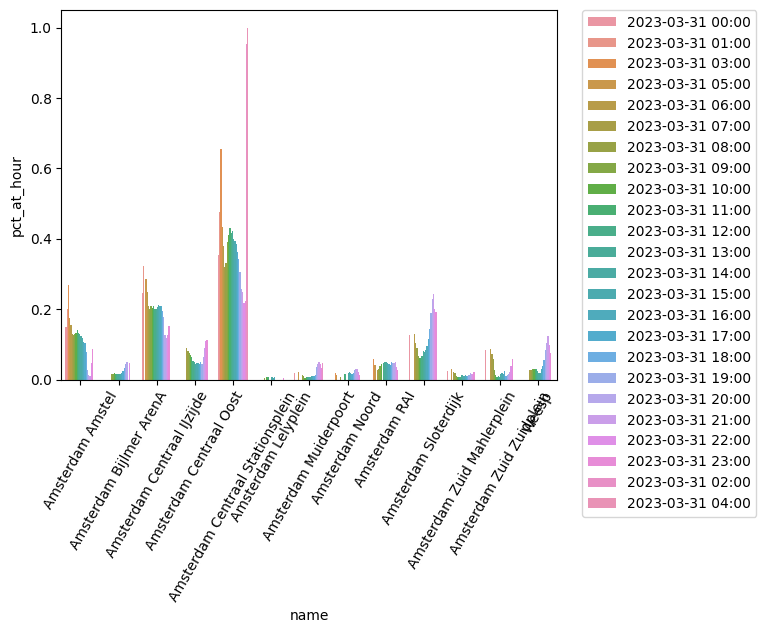

In [159]:
sns.barplot(data = reset, x = 'name', y = 'pct_at_hour', hue = 'time')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [44]:
print(minutely.head())

               name                time  num_bikes_available       lat  \
0  Amsterdam Amstel 2023-03-01 00:10:00                217.0  52.34701   
1  Amsterdam Amstel 2023-03-01 00:11:00                217.0  52.34701   
2  Amsterdam Amstel 2023-03-01 00:12:00                217.0  52.34701   
3  Amsterdam Amstel 2023-03-01 00:13:00                217.0  52.34701   
4  Amsterdam Amstel 2023-03-01 00:14:00                217.0  52.34701   

       lon     diffs  index_right  Oppervlakte_m2  
0  4.91875  0.067884         16.0       8992598.0  
1  4.91875  0.067884         16.0       8992598.0  
2  4.91875  0.067884         16.0       8992598.0  
3  4.91875  0.067884         16.0       8992598.0  
4  4.91875  0.067884         16.0       8992598.0  


In [45]:
average_per_hour = minutely.set_index('time').to_period(freq='H').reset_index().groupby(['name', 'time']).mean().reset_index()[['name', 'time', 'num_bikes_available']]
average_per_hour['pct_at_hour'] = \
    average_per_hour['num_bikes_available'] / average_per_hour.groupby('time')['num_bikes_available'].transform('sum')

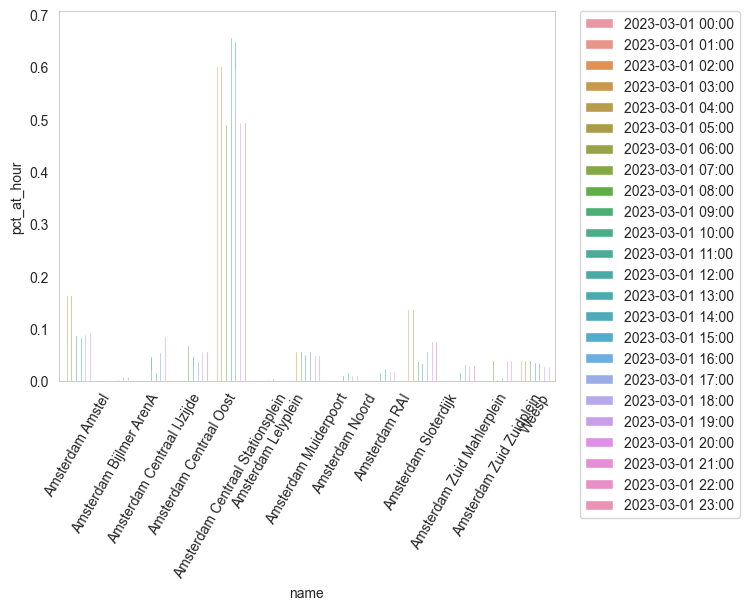

In [59]:
data = average_per_hour.loc[average_per_hour.time.dt.day < 2]
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(data= data, x='name', y='pct_at_hour', hue='time')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

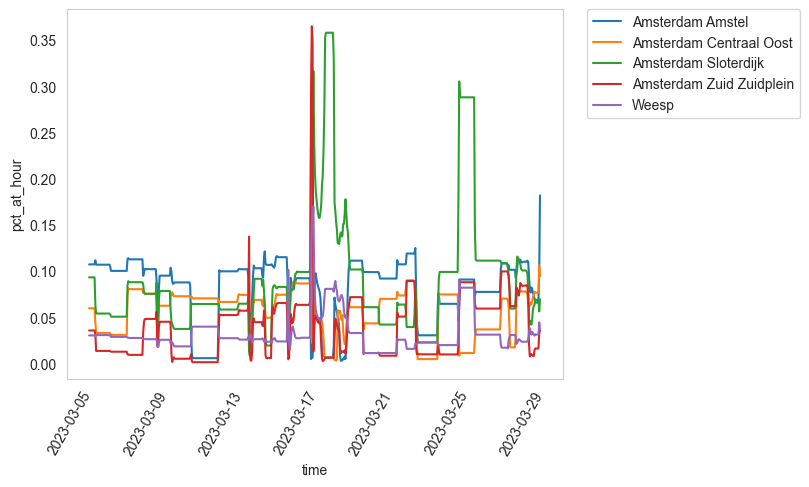

In [157]:
data = sliceNS(average_per_hour, 'day', 5,30, 2,7).set_index('time').to_timestamp()
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data= data, x='time', y='pct_at_hour', hue = 'name')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

(array([19417., 19421., 19425., 19429., 19433., 19437., 19441., 19445.,
        19448.]),
 [Text(19417.0, 0, '2023-03-01'),
  Text(19421.0, 0, '2023-03-05'),
  Text(19425.0, 0, '2023-03-09'),
  Text(19429.0, 0, '2023-03-13'),
  Text(19433.0, 0, '2023-03-17'),
  Text(19437.0, 0, '2023-03-21'),
  Text(19441.0, 0, '2023-03-25'),
  Text(19445.0, 0, '2023-03-29'),
  Text(19448.0, 0, '2023-04-01')])

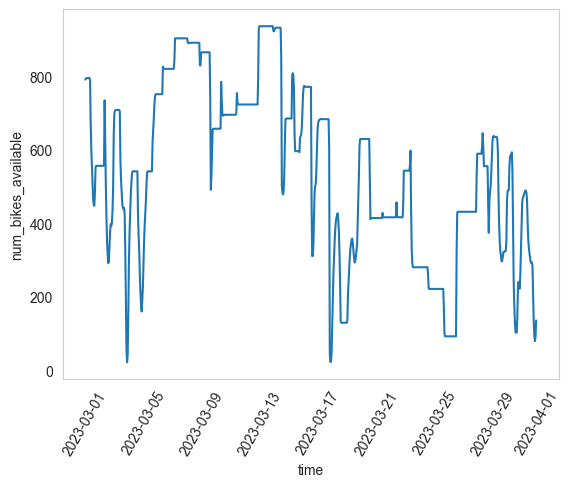

In [128]:
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(
    data= sliceNS(average_per_hour, 'day', 3, 8, 0,1).set_index('time').to_timestamp(),
    x= 'time', y='num_bikes_available')
plt.xticks(rotation=60)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)